# Pacial 1 - Temas en econometría
### Jorge De León

In [1]:
import pandas as pd
import numpy 
import seaborn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR



In [2]:
datos = pd.read_stata('dataset_4.dta', index_col='date')

In [3]:
df =   datos

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.set_index('date').index.to_period('W').to_timestamp(how='end').values, index=df.index, name='date|W'),
	df['us'],
	df['ca'],
	df['mx'],
	df['no'],
], axis=1)
chart_data = chart_data.sort_values(['date|W'])
chart_data = chart_data.rename(columns={'date|W': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['us'], name='us', **line_cfg
))
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['ca'], name='ca', **line_cfg
))
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['mx'], name='mx', **line_cfg
))
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['no'], name='no', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'us, ca, mx, no by date (Weekly)'},
    'xaxis': {'title': {'text': 'date (Weekly)'}},
    'yaxis': {'title': {'text': 'us, ca, mx, no'}, 'type': 'linear'}
}))

figure.show()


In [4]:
datos['diff_us'] = datos['us'].diff()
datos['diff_ca'] = datos['ca'].diff()
datos['diff_mx'] = datos['mx'].diff()
datos['diff_no'] = datos['no'].diff()

# SERIE US

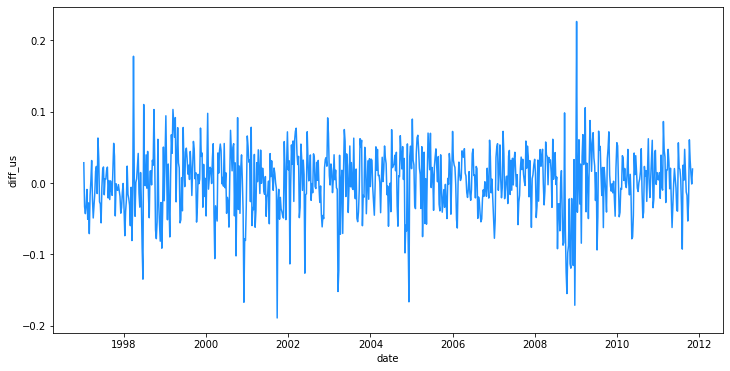

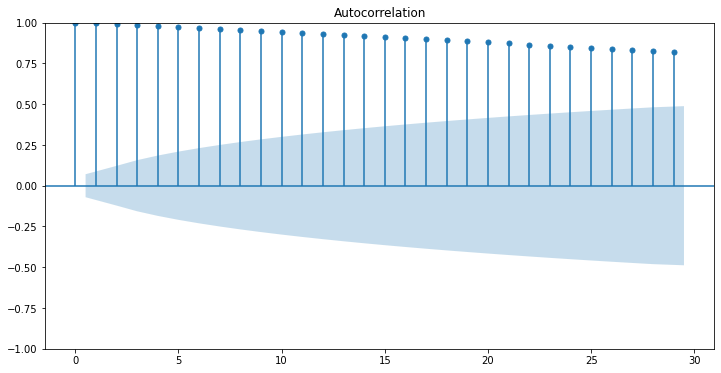

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=datos['diff_us'], color = "dodgerblue", ax=ax)

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
acf_1 = tsaplots.plot_acf (datos['us'], ax=ax)
plt.show ()

# SERIE CA

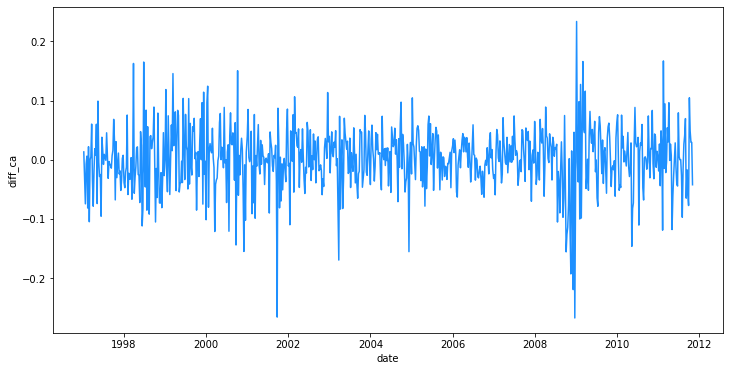

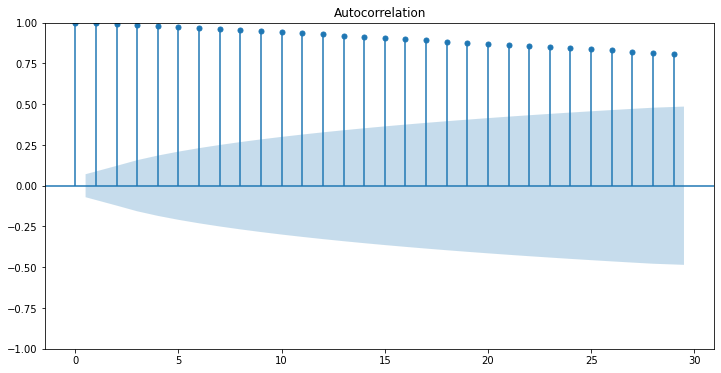

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=datos['diff_ca'], color = "dodgerblue", ax=ax)

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
acf_1 = tsaplots.plot_acf (datos['ca'], ax=ax)
plt.show ()

# SERIE MX

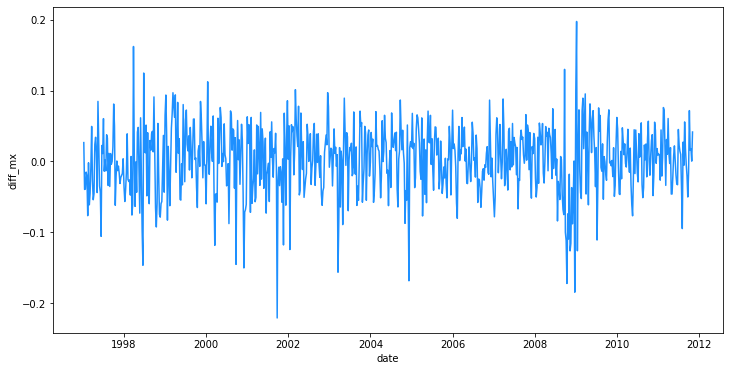

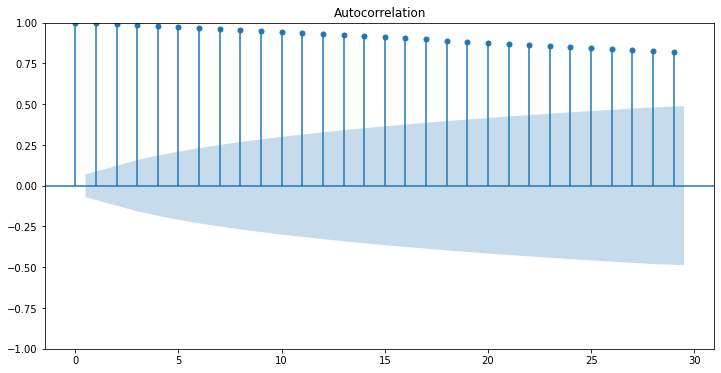

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=datos['diff_mx'], color = "dodgerblue", ax=ax)

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
acf_1 = tsaplots.plot_acf (datos['mx'], ax=ax)
plt.show ()

# SERIE NO

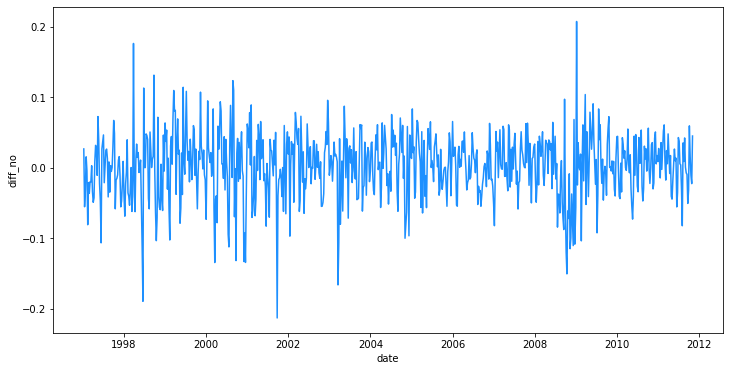

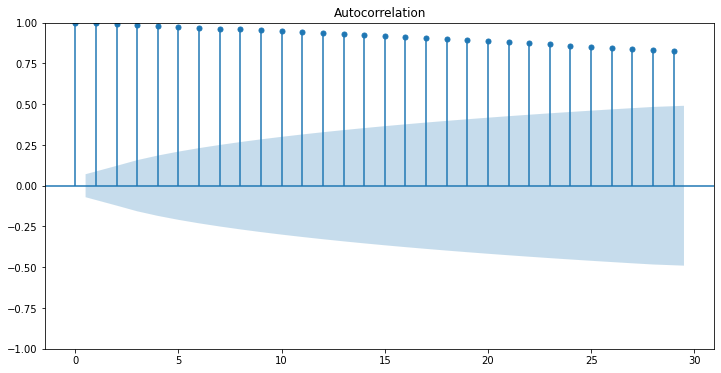

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=datos['diff_no'], color = "dodgerblue", ax=ax)

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
acf_1 = tsaplots.plot_acf (datos['no'], ax=ax)
plt.show ()

# ADF Y LEYBOURNE TESTS


In [9]:

adf2_us = adfuller(datos['us'], regression = 'c', autolag='AIC')
adf3_us = adfuller(datos['us'], regression = 'ctt', autolag='AIC')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 2 solo con constante
print('Resultados modelo 2')
print(f'ADF estadístico: {adf2_us[0]}')
print(f'p-valor: {adf2_us[1]}')
print('Valores críticos:')
for key, value in adf2_us[4].items():
    print(f'  {key}: {value}')
    

if adf2_us[0] < adf2_us[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf2_us[0] < adf2_us[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 3 con constante y tendencia 
print('Resultados modelo 3')
print(f'ADF estadístico: {adf3_us[0]}')
print(f'p-valor: {adf3_us[1]}')
print('Valores críticos:')
for key, value in adf3_us[4].items():
    print(f'  {key}: {value}')

if adf3_us[0] < adf3_us[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf3_us[0] < adf3_us[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 2
ADF estadístico: -0.8037498069517854
p-valor: 0.818018107845581
Valores críticos:
  1%: -3.438915730045254
  5%: -2.8653205426302253
  10%: -2.5687831424305845
No podemos rechazar la hipótesis nula. La serie es no estacionaria.
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 3
ADF estadístico: -3.6445716695932378
p-valor: 0.08060778043895594
Valores críticos:
  1%: -4.386300101640724
  5%: -3.8401112324494044
  10%: -3.5580404549583866
No podemos rechazar la hipótesis nula. La serie es no estacionaria.


In [10]:

adf2_ca = adfuller(datos['ca'], regression = 'c', autolag='BIC')
adf3_ca = adfuller(datos['ca'], regression = 'ctt', autolag='BIC')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 2
print('Resultados modelo 2')
print(f'ADF estadístico: {adf2_ca[0]}')
print(f'p-valor: {adf2_ca[1]}')
print('Valores críticos:')
for key, value in adf2_ca[4].items():
    print(f'  {key}: {value}')
    

if adf2_ca[0] < adf2_ca[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf2_ca[0] < adf2_ca[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 3
print('Resultados modelo 3')
print(f'ADF estadístico: {adf3_ca[0]}')
print(f'p-valor: {adf3_ca[1]}')
print('Valores críticos:')
for key, value in adf3_ca[4].items():
    print(f'  {key}: {value}')
    

if adf3_ca[0] < adf3_ca[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf3_ca[0] < adf3_ca[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')


---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 2
ADF estadístico: -0.8387737555290705
p-valor: 0.8074664792291459
Valores críticos:
  1%: -3.4388489336836003
  5%: -2.865291103159288
  10%: -2.568767459327767
No podemos rechazar la hipótesis nula. La serie es no estacionaria.
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 3
ADF estadístico: -3.258516596041995
p-valor: 0.1868398447691808
Valores críticos:
  1%: -4.3862014484002385
  5%: -3.840061084488202
  10%: -3.558009433760488
No podemos rechazar la hipótesis nula. La serie es no estacionaria.


In [11]:

adf2_mx = adfuller(datos['mx'], regression = 'c', autolag='BIC')
adf3_mx = adfuller(datos['mx'], regression = 'ctt', autolag='BIC')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 2
print('Resultados modelo 2')
print(f'ADF estadístico: {adf2_mx[0]}')
print(f'p-valor: {adf2_mx[1]}')
print('Valores críticos:')
for key, value in adf2_mx[4].items():
    print(f'  {key}: {value}')
    

if adf2_mx[0] < adf2_mx[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf2_mx[0] < adf2_mx[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 3
print('Resultados modelo 3')
print(f'ADF estadístico: {adf3_mx[0]}')
print(f'p-valor: {adf3_mx[1]}')
print('Valores críticos:')
for key, value in adf3_mx[4].items():
    print(f'  {key}: {value}')
    

if adf3_mx[0] < adf3_mx[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf3_mx[0] < adf3_mx[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 2
ADF estadístico: -0.7047798176114454
p-valor: 0.8455075695299203
Valores críticos:
  1%: -3.4388599939707056
  5%: -2.865295977855759
  10%: -2.5687700561872413
No podemos rechazar la hipótesis nula. La serie es no estacionaria.
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 3
ADF estadístico: -3.669762816834213
p-valor: 0.07580545709646444
Valores críticos:
  1%: -4.386221076262558
  5%: -3.840071061899066
  10%: -3.5580156057490897
No podemos rechazar la hipótesis nula. La serie es no estacionaria.


In [12]:

adf2_no = adfuller(datos['no'], regression = 'c', autolag='BIC')
adf3_no = adfuller(datos['no'], regression = 'ctt', autolag='BIC')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 2
print('Resultados modelo 2')
print(f'ADF estadístico: {adf2_no[0]}')
print(f'p-valor: {adf2_no[1]}')
print('Valores críticos:')
for key, value in adf2_no[4].items():
    print(f'  {key}: {value}')
    

if adf2_no[0] < adf2_no[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf2_no[0] < adf2_no[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------') 
# Modelo 3
print('Resultados modelo 3')
print(f'ADF estadístico: {adf3_no[0]}')
print(f'p-valor: {adf3_no[1]}')
print('Valores críticos:')
for key, value in adf3_no[4].items():
    print(f'  {key}: {value}')
    

if adf3_no[0] < adf3_no[4]['1%']:
    print('Rechazamos la hipótesis nula. La serie es estacionaria.')
elif adf3_no[0] < adf3_no[4]['5%']:
    print('Rechazamos la hipótesis nula a un nivel de significancia del 5%. La serie puede ser estacionaria.')
else:
    print('No podemos rechazar la hipótesis nula. La serie es no estacionaria.')

---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 2
ADF estadístico: -0.7718958489372661
p-valor: 0.8272383960577556
Valores críticos:
  1%: -3.4388599939707056
  5%: -2.865295977855759
  10%: -2.5687700561872413
No podemos rechazar la hipótesis nula. La serie es no estacionaria.
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Resultados modelo 3
ADF estadístico: -3.687148591461965
p-valor: 0.07262530790918974
Valores críticos:
  1%: -4.386221076262558
  5%: -3.840071061899066
  10%: -3.5580156057490897
No podemos rechazar la hipótesis nula. La serie es no estacionaria.


# VAR MODEL

In [13]:
lista = [4,5,6,7]
datos_var = datos.iloc[1:,lista]
var_model = VAR(datos_var)
for i in ['aic', 'bic', 'hqic']:
    #maxlags takes the number of lags we want to test
    #ic takes the information criterion metod based on which order would be suggested
    results = var_model.fit( ic=i)
    order = results.k_ar
    print(f"The suggested VAR order from {i} is {order}")

c:\Users\Jorge De León\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



The suggested VAR order from aic is 9
The suggested VAR order from bic is 2
The suggested VAR order from hqic is 2


In [14]:
model_fit = var_model.fit(4, trend = 'c')
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Mar, 2023
Time:                     21:02:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -29.8865
Nobs:                     768.000    HQIC:                  -30.1394
Log likelihood:           7343.32    FPE:                6.94874e-14
AIC:                     -30.2977    Det(Omega_mle):     6.36608e-14
--------------------------------------------------------------------
Results for equation diff_us
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.001598         0.001521            1.051           0.293
L1.diff_us         0.188532         0.145093            1.299           0.194
L1.diff_ca        -0.164047         0.059868           -2.740         

In [15]:
#To test absence of significant residual autocorrelations one can use the test_whiteness method of VARResults
test_corr = model_fit.test_whiteness(nlags = 5, signif=0.05, adjusted=False)

##Print the p-value
##There is no serial autocorrelation in residuals if p-value is more than 0.05
corre = test_corr.pvalue
if corre > 0.05:
    print('No hay correlación serial entre los errores')
else:
    print('Hay correlacion serial entre los errores')

Hay correlacion serial entre los errores


In [16]:
granger_test_result = grangercausalitytests(datos_var, maxlag=4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.1139 , p=0.0000  , df_denom=766, df_num=1
ssr based chi2 test:   chi2=20.2452 , p=0.0000  , df=1
likelihood ratio test: chi2=19.9840 , p=0.0000  , df=1


ValueError: wrong shape for coefs

# Prueba de granger